# [Sutton and Barto Notebooks](https://github.com/seungjaeryanlee/sutton-barto-notebooks): Figure 2.4

[모두AI](https://www.modu.ai)  
Author: Ryan Lee  
저자: 이승재  

![Figure 2.4](figure_2_4.png)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def argmax_all(list_):
    """
    Returns all argmax of given list in a list. Different from np.argmax which 
    returns first instance only.
    주어진 list의 최대값들의 index들을 list 형태로 반환합니다. 첫 최대값의 index만 반환하는
    np.argmax와는 다릅니다.
    """
    return np.argwhere(list_ == list_.max()).flatten()

## Environment

![Figure 2.1](figure_2_1.png)

In [3]:
class Environment:
    """
    The 10-armed Testbed environment shown in Figure 2.1.
    Figure 2.1에서 보여진 10개의 행동이 가능한 Bandit입니다.
    """
    def __init__(self, n_actions=10):
        self.action_space = [i for i in range(n_actions)]
        self.distributions = []
        for _ in range(n_actions):
            mean = np.random.normal(0, 1)
            stddev = 1
            self.distributions.append((mean, stddev))

        self.optimal_action = np.argmax([d[0] for d in self.distributions])

    def step(self, action):
        """
        Returns the reward of the given action.
        주어진 행동에 대한 보상을 반환합니다.
        """
        mean, stddev = self.distributions[action]
        reward = np.random.normal(loc=mean, scale=stddev)
        return reward

    def reset(self):
        """
        Reset the reward distributions of the environment.
        환경의 보상 분포들을 재설정합니다.
        """
        self.distributions = []
        for _ in range(len(self.action_space)):
            mean = np.random.normal(0, 1)
            stddev = 1
            self.distributions.append((mean, stddev))

        self.optimal_action = np.argmax([d[0] for d in self.distributions])

## Agent

This is an implementation of the Bandit algorithm specified in the book.  
책에 포함된 밴딧 알고리즘을 구현했습니다.  

In [4]:
class EpsilonGreedyAgent:
    """
    An e-greedy agent.
    엡실론 탐욕 에이전트입니다.
    """
    def __init__(self, action_space, epsilon=0):
        self.action_space = action_space
        self.q = np.zeros(len(action_space))
        self.action_counts = np.zeros(len(action_space), dtype=int)
        self.epsilon = epsilon

    def get_action(self):
        """
        Choose action with epsilon-greedy policy.
        엡실론 탐욕 정책으로 행동을 선택합니다.
        """
        if random.random() < self.epsilon:
            return np.random.choice(self.action_space)
        else:
            return np.random.choice(argmax_all(self.q))

    def update_q(self, action, reward):
        """
        Update appropriate Q value with given action and reward.
        주어진 행동과 보상으로 Q값을 업데이트합니다.
        """
        self.action_counts[action] += 1
        self.q[action] += (reward - self.q[action]) / self.action_counts[action]

    def reset(self):
        """
        Reset agent's Q values to 0.
        에이전트의 Q값들을 0으로 재설정합니다.
        """
        self.q = np.zeros(len(self.action_space))
        self.sum_rewards = np.zeros(len(self.action_space))
        self.action_counts = np.zeros(len(self.action_space), dtype=int)

In [5]:
class UCBAgent:
    """
    An Upper Confidence Bound agent.
    UCB 에이전트입니다.
    """
    def __init__(self, action_space, ucb_c=0):
        self.action_space = action_space
        self.q = np.zeros(len(action_space))
        self.action_counts = np.zeros(len(action_space), dtype=int)
        self.ucb_c = ucb_c

        assert epsilon == 0 or ucb_c == 0

    def get_action(self):
        """
        Choose action with epsilon-greedy policy.
        엡실론 탐욕 정책으로 행동을 선택합니다.
        """
        if random.random() < self.epsilon:
            return np.random.choice(self.action_space)
        else:
            return np.random.choice(argmax_all(self.q))

    def update_q(self, action, reward):
        """
        Update appropriate Q value with given action and reward.
        주어진 행동과 보상으로 Q값을 업데이트합니다.
        """
        self.action_counts[action] += 1
        self.q[action] += (reward - self.q[action]) / self.action_counts[action]

    def reset(self):
        """
        Reset agent's Q values to 0.
        에이전트의 Q값들을 0으로 재설정합니다.
        """
        self.q = np.zeros(len(self.action_space))
        self.sum_rewards = np.zeros(len(self.action_space))
        self.action_counts = np.zeros(len(self.action_space), dtype=int)

## Plots

In [6]:
def run(env, agent, n_steps=1000):
    """
    Take actions on the bandit environment. This is called a "run".
    Bandit 환경에서 n_steps 번 행동을 합니다. 이것을 하나의 '실행'이라 합니다.
    """
    actions = np.zeros(n_steps, dtype=int)
    rewards = np.zeros(n_steps)
    for i in range(n_steps):
        actions[i] = agent.get_action()
        rewards[i] = env.step(actions[i])
        agent.update_q(actions[i], rewards[i])

    return (actions, rewards)

In [7]:
def runs(env, agent, n_runs=2000, n_steps=1000):
    """
    Perform multiple runs on given environment and agent, resetting
    environment and agent after every run. Resetting environment
    changes the actions' reward distributions, and resetting the
    agent resets its Q values.
    주어진 환경과 에이전트로 여러 번 실행합니다. 각 실행마다 환경과 에이전트는
    초기화됩니다. 환경이 초기화되면 각 행동들의 보상 분포가 바뀌고, 에이전트가
    초기화되면 Q값이 초기화됩니다.
    """
    sum_rewards = np.zeros(n_steps)
    optimal_action_counts = np.zeros(n_steps)

    for i in range(n_runs):
        env.reset()
        agent.reset()

        actions, rewards = run(env, agent, n_steps)

        sum_rewards = np.add(sum_rewards, rewards)

    return sum_rewards / n_steps

In [11]:
def plot(agents, n_runs, n_steps):
    """
    Plot a graph of average rewards throughout runs for agents specified by
    their epsilon values.
    실행들 동안 각 시간 스텝의 평균 보상을 나타내는 그래프를 그립니다.
    """
    plt.xlabel('Steps')
    plt.ylabel('Average reward', rotation='horizontal', ha='right')
    
    names = []
    for agent in agents:
        names.append('')
        env = Environment()
        avg_rewards = runs(env, agent, n_runs, n_steps)
        plt.plot(avg_rewards)

    plt.legend(names)
    # plt.savefig('plot.png')
    plt.show()

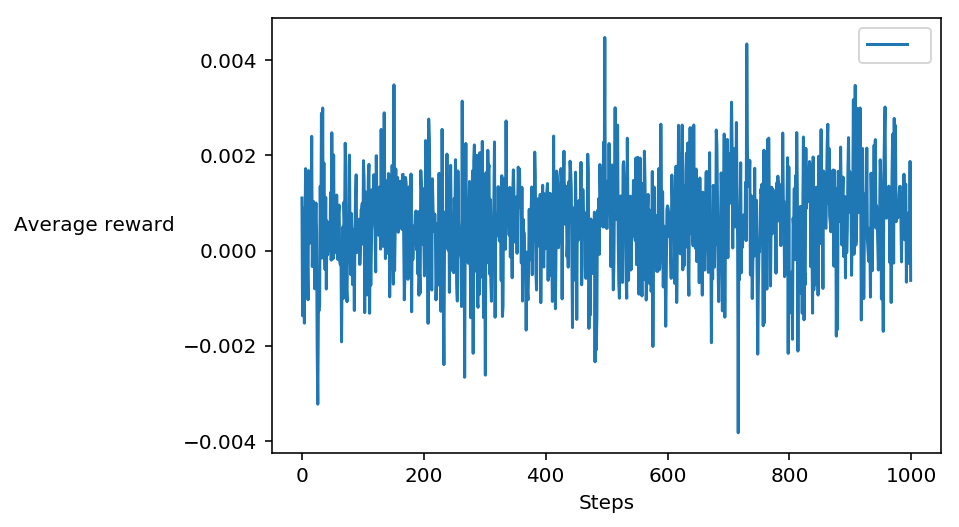

In [12]:
env = Environment()
agents = [
    EpsilonGreedyAgent(env.action_space, epsilon=0.1)
]

plot(agents, n_runs=1, n_steps=1000)